# Preliminary Steps

This document has been adapted from the sklearn tutorial (http://scipy-lectures.org/packages/scikit-learn/index.html). It has been modified for the MAIN 2019 training day audience.

Import relevant packages:

In [29]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt

### Programming sidenote

We are using Python, which is an __object-oriented__ programming language.  
__Object-oriented__: Programming structure is focused on *objects*.  
*Objects*: Structures which contain data, as well as methods which operate on that data.  
Data and methods held within objects are accessed using "." (period) in Python.  
Ex: if we have an object called *apple*, it may have data such as *apple.shape* or *apple.colour*, and it may have methods such as *apple.eat()* or *apple.throw()*.  
  
Class vs. object:  
A class is the generic structure for objects; they define what data is supposed to look like and what methods are available.  
An object is an instance of a class; it has specific values for data, and its methods act on that data.  
Ex: A Person is a class; you can't point to "Person", but you can describe attributes a Person may have (height, weight, eye color) even though you can't say how tall a Person is. Henry is an instance of a Person; Henry has exact values for height, weight, and eye color.

# Scikit-learn: Classification

Scikit-learn ("sklearn") uses a common interface for its estimators (models). You create an instance of a model, fit it to your data by using model.fit(data, target), and you can then use it to make predictions using model.predict(new_data).  
  
Sklearn contains a number of example datasets. In this section, we'll look at the iris dataset, which contains information about different flowers and we will try to predict its species based on a few of the plant's features. Load the iris dataset and print its shape:

In [37]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)

(150, 4)


Sklearn uses the data structure convention of (n_samples, n_features). The iris dataset has 150 samples, with each sample having 4 features.  
Let's look at the first few samples:

In [34]:
print(iris.data[0:5])
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Let's also look at the target, or label of the data:

In [35]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


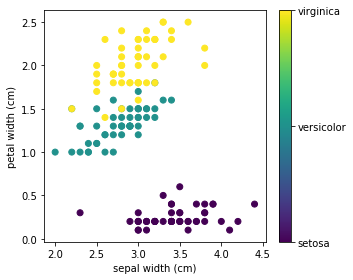

In [36]:
# From: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html
# The indices of the features that we are plotting
x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## Classification: k nearest neighbours: kNN

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class. Let’s try it out on our iris classification problem:

In [55]:
# Get the data and target
from sklearn import neighbors
iris = load_iris()
X, y = iris.data, iris.target

In [56]:
# Instantiate the kNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


And that's it! Our model, "knn" is now a trained classifier.

We can plot our class boundaries for our kNN classifier (from http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html)

(4.2, 8.0, 1.9, 4.5)

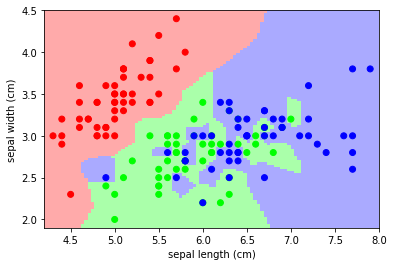

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

## Classification: Logistic Regression

Let's look at a different classifier: Logistic Regression (despite its name, it does classification)

In [71]:
from sklearn.linear_model import LogisticRegression
X, y = iris.data, iris.target
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit.fit(X, y)
# As before: What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[logit.predict([[3, 5, 4, 2]])])

['virginica']


We get the same result as we did before. However, we're now faced with a critical question: How good are these models? How do we know how well they perform? Are these models reliable?

# Model Evaluation: Dataset splitting

Sklearn provides us with many useful tools for manipulating and separating datasets. We'll first look at train_test_split, which splits data into training/test sets.

In [151]:
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (150, 4)
y shape: (150,)


In [154]:
# Split into training / testing sets. 
# We can specify the proportion we want in each set using the train_size and/or test_size parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (90, 4)
X_test shape: (60, 4)
y_train shape: (90,)
y_test shape: (60,)


We now have two sets: one set we use to optimize our models, and another set to evaluate how they perform. Let's recreate our previous classifiers.  
Sklearn estimators have the *score* method, which allows us to quickly evaluate the model performance on a particular dataset:

In [155]:
# Instantiate and train our models
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
logit = LogisticRegression(multi_class='auto',solver='liblinear')
logit.fit(X_train, y_train)

# Evaluate our models!
knn_score = knn.score(X_test, y_test)
logit_score = logit.score(X_test, y_test)
print('kNN accuracy: {}'.format(knn_score))
print('logit accuracy: {}'.format(logit_score))

if(knn_score > logit_score):
    print('knn performs better!')
else:
    print('logit performs better!')
        

kNN accuracy: 0.9333333333333333
logit accuracy: 0.9166666666666666
knn performs better!


Try the following and rerun the previous cells:  
 1) Modify the "n_neighbors" parameter for the kNN classifier  
 2) Change the "train_size" and "test_size" parameters for the data split (they must sum to <= 1)  
 3) Add "stratify=y" to train_test_split so that the labels are balanced in the training and test sets  
 4) *Do nothing and just rerun them*  

Your model performance depends on the type of model you select and how much data is available for training/evaluation. The fourth point highlights something which is deceptively simple: your model performance also depends on which data points are present in your training and validation sets.  
  
The problem is similar when delving into model *hyperparameters*. Hyperparameters are parameters that are not directly optimized by the data, but that can have a huge impact on model performance. Hyperparameters are determined either by heuristic domain-specific information acquisition ("guessing") or preferably cross-validation.

# Model Evaluation: Cross-Validation

Sklearn provides us with convenient functions for doing cross-validation: cross_val_score  
The function defaults to Kfold CV, but other methods are available through sklearn.model_selection

In [192]:
# Import cross validation function:
from sklearn.model_selection import cross_val_score
# Create the classifier:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit_scores = cross_val_score(logit, X_train, y_train, cv=5)
print('Logit cross-validation scores: {}'.format(logit_scores))
print('Mean: {}'.format(np.mean(logit_scores)))
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print('knn cross-validation scores: {}'.format(knn_scores))
print('Mean: {}'.format(np.mean(knn_scores)))

Logit cross-validation scores: [0.89473684 0.94444444 0.83333333 1.         1.        ]
Mean: 0.9345029239766081
knn cross-validation scores: [0.94736842 0.94444444 0.83333333 1.         1.        ]
Mean: 0.9450292397660819
